In [1]:
from __future__ import print_function, division


import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import pandas as pd
import thinkstats2
import thinkplot

In [60]:
plt.style.use('fivethirtyeight')

In [97]:
data = pd.read_csv("FinalProject/fifa19_data.csv")
#data = df_main.sample(frac=.25)

data.shape

(18207, 89)

In [101]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [102]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [64]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0          0
ID                  0
Name                0
Age                 0
Photo               0
                 ... 
GKHandling         15
GKKicking          15
GKPositioning      15
GKReflexes         15
Release Clause    406
Length: 89, dtype: int64

In [104]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0, inplace = True)

remove 'lbs' from weight value

In [105]:

data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [106]:
def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)



In [91]:
# applying the function to weight column

data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))
data['Weight'].head()

11333    159.0
15510    143.0
13120    152.0
13340    179.0
13405    146.0
Name: Weight, dtype: float64

In [4]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]

In [5]:
# let's check the Indian Players
country('India')

,Name,Overall,Potential,Position
16450,S. Paul,57,57,NaN
15855,M. Rafique,58,61,CM
16135,S. Bose,58,66,LB
14915,H. Narzary,60,66,LM
16265,R. Borges,58,60,CDM


In [6]:
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Manchester United')



,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
319,M. Rashford,11.0,LW,81,England,20,€110K,€27M,2020
377,C. Smalling,12.0,RCB,81,England,28,€130K,€16M,2019
132,N. Matić,31.0,CDM,84,Serbia,29,€165K,€24M,2020
327,E. Bailly,2.0,CB,81,Ivory Coast,24,€105K,€21M,2020
11081,R. Poole,50.0,CB,64,Wales,20,€13K,€675K,2019
399,A. Valencia,16.0,RM,81,Ecuador,32,€120K,€10M,2019
93,A. Sánchez,7.0,RW,85,Chile,29,€215K,€37.5M,2022
584,V. Lindelöf,3.0,CB,79,Sweden,23,€91K,€14.5M,2021
3,De Gea,1.0,GK,91,Spain,27,€260K,€72M,2020
8191,A. Gomes,47.0,CAM,67,England,17,€15K,€1.5M,2021


In [107]:
# renaming a column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

selected_columns =['Name',"Age","Photo","Nationality","Flag","Club_Logo","Club","Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy","LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower","Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Marking","StandingTackle","SlidingTackle"]
players = data[selected_columns]

players.head()

,Name,Age,Photo,Nationality,Flag,Club_Logo,Club,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona,84.0,95.0,70.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,84.0,94.0,89.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain,79.0,87.0,62.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United,17.0,13.0,21.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,93.0,82.0,55.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


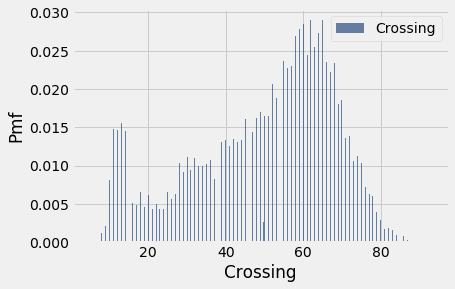

In [108]:
import thinkstats2
import thinkplot
crossing_pmf = thinkstats2.Pmf(players['Crossing'], label='Crossing')
thinkplot.Hist(crossing_pmf)
thinkplot.Config(xlabel='Crossing', ylabel='Pmf')

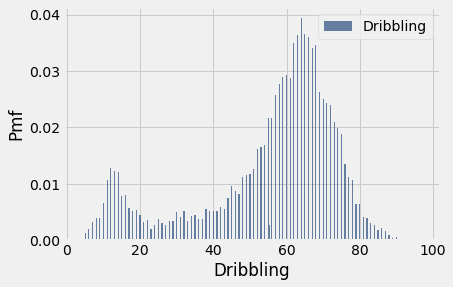

In [109]:
dribbling_pmf = thinkstats2.Pmf(players['Dribbling'], label='Dribbling')
thinkplot.Hist(dribbling_pmf)
thinkplot.Config(xlabel='Dribbling', ylabel='Pmf')

Plot Histograms

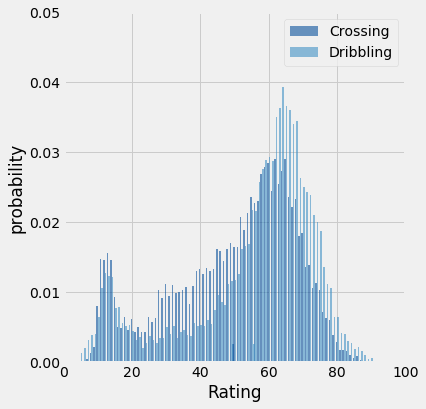

In [110]:
width=0.45
axis = [0,100, 0, .05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(crossing_pmf, align='right', width=width)
thinkplot.Hist(dribbling_pmf, align='left', width=width)
thinkplot.Config(xlabel='Rating',
                     ylabel='probability', axis=axis)



Plot the PMFs

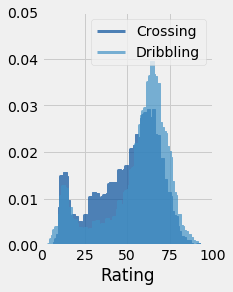

<Figure size 576x432 with 0 Axes>

In [111]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([crossing_pmf, dribbling_pmf])
thinkplot.Show(xlabel='Rating', axis=axis)


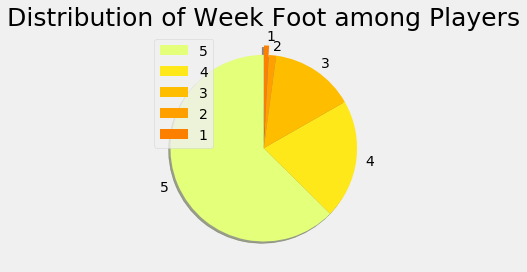

In [114]:
labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

In [119]:
youth = data.query('Age < 18')
adult = data.query('18 < Age < 30')
veteran = data.query('Age > 30')

In [125]:
veteran.Age.min()

31

12082    159.0
564      176.0
16059    157.0
6500     161.0
5134     183.0
Name: Weight, dtype: float64